In [1]:
import json
import pandas as pd
from pprint import pprint
%matplotlib inline

In [42]:
fp = open("input_csv/ed_trade_data.json")
data = json.load(fp)
pairs = data.keys()
pair_iter = iter(pairs)

In [66]:
pair = pair_iter.next()
trade_data1 = data[pair]
trade_data = pd.DataFrame(trade_data1)
trade_data['datetime'] = pd.to_datetime(trade_data['date'])
trade_data['price'] = trade_data['price'].astype(float)
trade_data['amountBase'] = trade_data['amountBase'].astype(float)
trade_data['amount'] = trade_data['amount'].astype(float)
sdata = trade_data[['datetime','amount', 'amountBase', 'price']].set_index('datetime')
maxdate = sdata.index.max()
mindate = sdata.index.min()
total_days = (maxdate - mindate).days
grouped = sdata.groupby(lambda x: x.month)
grouped.index = 'month'
no_of_trades = grouped['amount'].count()
a = grouped['amount'].sum()
b = grouped['amountBase'].sum()
c = b / a
if (total_days != 0):
    daily_trades_average = sum(no_of_trades) / (total_days)
else:
    daily_trades_average = 0
print 'pair :', pair
print 'Max_date :', maxdate
print 'Min_date :', mindate
print 'Total_no_of_days :', total_days
print 'No_of_trades :', sum(no_of_trades)
print 'Total_volume_traded :', sum(a)
print 'Total_turnover :', sum(b)
print 'Avg_price_of_unit_volume :', sum(c)/len(c)
print 'Avg_daily_trades :', daily_trades_average

pair : ETH_PPT
Max_date : 2017-11-02 17:04:12
Min_date : 2017-11-01 08:20:44
Total_no_of_days : 1
No_of_trades : 500
Total_volume_traded : 106555.383529
Total_turnover : 1278.57103548
Avg_price_of_unit_volume : 0.0119991218945
Avg_daily_trades : 500


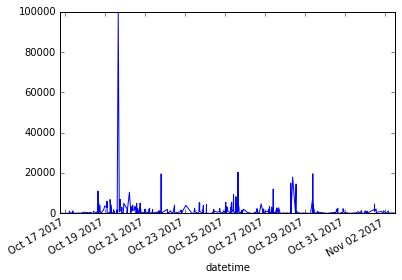

In [129]:
sdata['amount'].plot()

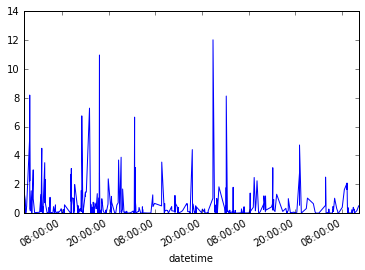

In [69]:
sdata['amountBase'].plot()

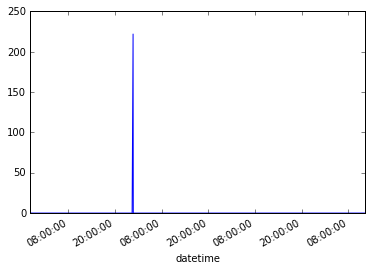

In [70]:
sdata['price'].plot()

In [71]:
sdata.describe()

,amount,amountBase,price
count,5.000000e+02,5.000000e+02,500.000000
mean,1.010212e+03,6.361582e-01,0.444670
std,2.231204e+03,1.376719e+00,9.928112
min,3.718300e-13,2.640000e-16,0.000200
25%,2.401081e+01,1.839550e-02,0.000598
50%,2.016194e+02,1.464347e-01,0.000680
75%,9.355604e+02,6.100173e-01,0.000710
max,1.960000e+04,1.203133e+01,222.000000


In [72]:
def get_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return df_out[col_name]
get_outlier(sdata, 'price')


datetime
2017-11-02 10:29:32      0.002400
2017-11-01 21:31:36      0.000880
2017-11-01 11:54:07      0.000957
2017-11-01 11:49:52      0.000957
2017-11-01 11:49:40      0.000950
2017-11-01 06:48:42      0.000960
2017-11-01 06:48:13      0.000960
2017-11-01 06:47:20      0.000960
2017-11-01 06:30:59      0.000978
2017-11-01 06:04:34      0.000980
2017-11-01 05:10:48      0.000980
2017-11-01 04:30:59      0.000980
2017-11-01 03:59:40      0.000990
2017-11-01 03:58:58      0.000988
2017-11-01 03:52:59      0.000988
2017-11-01 03:52:17      0.000988
2017-11-01 03:51:44      0.000987
2017-11-01 03:10:21      0.000988
2017-11-01 03:09:05      0.000988
2017-11-01 03:08:02      0.000988
2017-11-01 03:00:00      0.000200
2017-11-01 02:59:50      0.000200
2017-11-01 02:43:08      0.000988
2017-11-01 02:31:03      0.001200
2017-11-01 02:13:39      0.000990
2017-11-01 02:13:12      0.000900
2017-11-01 02:13:12      0.000900
2017-11-01 01:53:31      0.000400
2017-10-31 00:40:31    222.000000
2017-

In [73]:
def get_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return df_out[col_name]
get_outlier(sdata, 'amount')


datetime
2017-11-02 09:15:53     3116.323651
2017-11-02 09:15:46     2400.000000
2017-11-02 09:12:17     3040.926349
2017-11-02 08:34:48     2400.000000
2017-11-02 03:45:18     4995.581000
2017-11-01 21:03:18     9000.000000
2017-11-01 21:03:18     2768.927000
2017-11-01 21:02:35     5000.000000
2017-11-01 14:10:53     3000.000000
2017-11-01 14:10:53     5000.000000
2017-11-01 14:10:53     3900.000000
2017-11-01 10:08:13     2802.373000
2017-11-01 09:24:17     3090.419699
2017-11-01 02:13:39     8209.298000
2017-11-01 00:20:41     2606.436000
2017-10-31 22:49:25    15935.542000
2017-10-31 22:48:32     4038.192977
2017-10-31 22:48:32    14388.496554
2017-10-31 17:30:06     6343.338722
2017-10-31 09:39:01     5252.500000
2017-10-31 02:52:14     4386.402153
2017-10-31 02:46:10     3925.423295
2017-10-31 02:46:10     3937.235000
2017-10-31 02:40:15     9828.042531
2017-10-31 02:40:15     9798.646591
2017-10-30 23:35:47     2339.237641
2017-10-30 23:13:35     5000.000000
2017-10-30 23:12:40

In [74]:
def get_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return df_out[col_name]
get_outlier(sdata, 'amountBase')

datetime
2017-11-02 09:15:53     2.087937
2017-11-02 09:15:46     1.631998
2017-11-02 09:12:17     2.037421
2017-11-02 08:34:48     1.632000
2017-11-02 03:45:18     2.497795
2017-11-01 21:03:18     4.727268
2017-11-01 21:03:18     1.509065
2017-11-01 21:02:35     2.750005
2017-11-01 14:10:53     2.044500
2017-11-01 14:10:53     3.150000
2017-11-01 14:10:53     2.457004
2017-11-01 10:08:13     2.241898
2017-11-01 09:24:17     2.472336
2017-11-01 03:59:40     1.791124
2017-11-01 02:13:39     8.127205
2017-11-01 02:13:12     1.773900
2017-11-01 00:20:41     1.824505
2017-10-31 22:49:25    12.031334
2017-10-31 22:48:32     2.786353
2017-10-31 22:48:32    10.000005
2017-10-31 17:30:06     4.408620
2017-10-31 09:39:01     3.540132
2017-10-31 02:52:14     3.158210
2017-10-31 02:46:10     2.826305
2017-10-31 02:46:10     2.791500
2017-10-31 02:40:15     6.629015
2017-10-31 02:40:15     6.663080
2017-10-30 23:35:47     1.672532
2017-10-30 23:13:35     2.550000
2017-10-30 23:12:40     3.874745
2

In [14]:
l1 = list(data.keys())
for i in l1:
    x_i = data[i]
    df_i =  pd.DataFrame(x_i)
    df_i['datetime'] = pd.to_datetime(df_i['date'])
    df_i['price'] = df_i['price'].astype(float)
    df_i['amount'] = df_i['amount'].astype(float)
    df_i['amountBase'] = df_i['amountBase'].astype(float)
    df = df_i[['datetime', 'amount', 'amountBase', 'price']].set_index('datetime')
    shape = df_i.shape
    maxdate = df.index.max()
    mindate = df.index.min()
    total_days = (maxdate - mindate).days
    grouped = df.groupby(lambda x: x.month)
    grouped.index = 'month'
    no_of_trades = sum(grouped['amount'].count())
    traded_volume = sum(grouped['amount'].sum())
    turnover = sum(grouped['amountBase'].sum())
    price_of_unit_volume = ((turnover) / (traded_volume))
    daily_trades_average = (no_of_trades) / (total_days)
    print 'pair :', pair
    print 'shape :', shape
    print 'Min_date :', mindate
    print 'Max_date :', maxdate
    print 'Total_no_of_days :', total_days
    print 'No_of_trades :', no_of_trades
    print 'Total_volume_traded :', traded_volume
    print 'Total_turnover :', turnover
    print 'Avg_price_of_unit_volume :', (sum(price_of_unit_volume)/len(price_of_unit_volume))
    print 'Avg_daily_trades :', sum(daily_trades_average)

 pair : ETH_NEWB
shape : (353, 10)
Min_date : 2017-08-17 03:59:39
Max_date : 2017-11-02 13:31:54
Total_no_of_days : 77
No_of_trades : 353
Total_volume_traded : 1592915.0
Total_turnover : 58.5228604455
Avg_price_of_unit_volume :

TypeError: 'float' object is not iterable

In [ ]:
dict(dict([('pair', pair), ('shape', shape), ('min_date', mindate), ('max_date', maxdate), ('total_no_of_days', total_days), ('no_of_trades', no_of_trades), ('total_traded_volume', volume_traded), ('total_turnover', turnover), ('Avg_price_of_unit_volume', (sum(price_of_unit_volume)/len(price_of_unit_volume))), ('Avg_daily_trades', daily_trades_average)]))